# 1. ¿Cómo se distribuyen los datos? ¿Encontró algún insight notable para compartir? ¿Qué puede concluir al respecto?

Para comenzar, debemos cargar los datos del archivo CSV "dataset_SCL.csv" en un DataFrame de Pandas. Podemos hacer esto con el siguiente código:

In [1]:
# Paso 1: Importar bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Paso 2: Cargar datos
df = pd.read_csv(r'datasets/Data_SCL/dataset_SCL.csv', parse_dates=['Fecha-I', 'Fecha-O'], dtype={'Vlo-I': str, 'Vlo-O': str})
df

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68201,2017-12-22 14:55:00,400,SCEL,SPJC,JAT,2017-12-22 15:41:00,400.0,SCEL,SPJC,JAT,22,12,2017,Viernes,I,JetSmart SPA,Santiago,Lima
68202,2017-12-25 14:55:00,400,SCEL,SPJC,JAT,2017-12-25 15:11:00,400.0,SCEL,SPJC,JAT,25,12,2017,Lunes,I,JetSmart SPA,Santiago,Lima
68203,2017-12-27 14:55:00,400,SCEL,SPJC,JAT,2017-12-27 15:35:00,400.0,SCEL,SPJC,JAT,27,12,2017,Miercoles,I,JetSmart SPA,Santiago,Lima
68204,2017-12-29 14:55:00,400,SCEL,SPJC,JAT,2017-12-29 15:08:00,400.0,SCEL,SPJC,JAT,29,12,2017,Viernes,I,JetSmart SPA,Santiago,Lima


In [3]:
# Paso 3: Explorar estructura de datos
# imprimir la información de resumen del DataFrame
print(df.info())

# imprimir las primeras filas del DataFrame
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Fecha-I    68206 non-null  datetime64[ns]
 1   Vlo-I      68206 non-null  object        
 2   Ori-I      68206 non-null  object        
 3   Des-I      68206 non-null  object        
 4   Emp-I      68206 non-null  object        
 5   Fecha-O    68206 non-null  datetime64[ns]
 6   Vlo-O      68205 non-null  object        
 7   Ori-O      68206 non-null  object        
 8   Des-O      68206 non-null  object        
 9   Emp-O      68206 non-null  object        
 10  DIA        68206 non-null  int64         
 11  MES        68206 non-null  int64         
 12  AÑO        68206 non-null  int64         
 13  DIANOM     68206 non-null  object        
 14  TIPOVUELO  68206 non-null  object        
 15  OPERA      68206 non-null  object        
 16  SIGLAORI   68206 non-null  object       

Text(0.5, 67.61868080096086, 'Promedio: 66.62%')

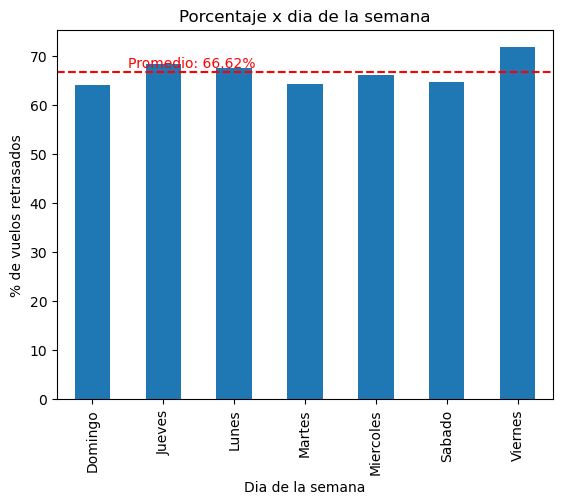

In [63]:
# Analisis de Retrasos por cada dia de la Semana.

# Calcular el retraso en minutos de cada vuelo
df['Retraso'] = (df['Fecha-O'] - df['Fecha-I']).dt.total_seconds() / 60

# Agregar una columna para indicar si el vuelo se retrasó o no
#donde el valor de cada fila será 1 si el valor en la columna "Retraso" es mayor que 0, y 0 en caso contrario.
df['Retrasado'] = (df['Retraso'] > 0).astype(int)

# Guardar los cambios en un nuevo archivo CSV agregando la columna de Retrasos.
df.to_csv("datasets/Data_SCL/dataset_SCL_Retraso.csv", index=False)

# Agrupar los datos por día de la semana y calcular el porcentaje de vuelos retrasados en cada día
porcentaje_retrasadosxdía = df.groupby('DIANOM')['Retrasado'].mean() * 100

promedio_retrasos_x_dia_semana = porcentaje_retrasadosxdía.mean()

# Visualizar los resultados con un gráfico de barras
porcentaje_retrasadosxdía.plot(kind='bar')

plt.xlabel("Dia de la semana")
plt.ylabel("% de vuelos retrasados")
plt.title("Porcentaje x dia de la semana")

# Agregar una línea horizontal para el promedio de retrasos
plt.axhline(y=promedio_retrasos_x_dia_semana, color='red', linestyle='--', label='Promedio')
plt.text(x=0.5, y=promedio_retrasos_x_dia_semana+1, s=f"Promedio: {promedio_retrasos_x_dia_semana:.2f}%", color='red')

#Se observa que el mayor porcentaje de retrasos ocurren los días viernes (aprox 70%), pero no esta muy por sobre el resto de días.
#Independiente del día de la semana, sobre el 60% de los vuelos presentan retraso.
#En conclusion no se observa una correlacion entre los retrasos y el día de la semana, ya que se distribuyen relativamente uniforme independiente del día.

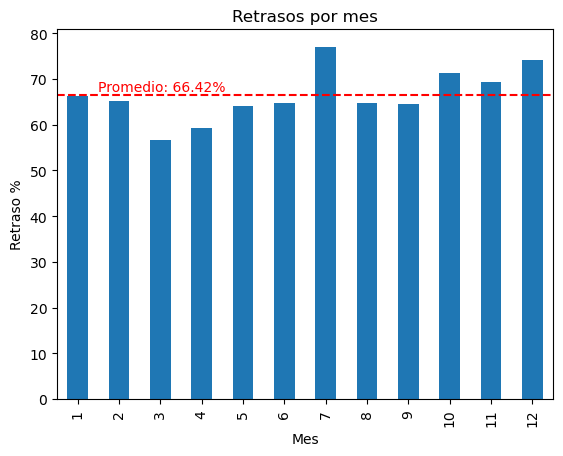

In [62]:
# Analisis de Retrasos por meses del año (Buscar alguna correlacion entre los Retrasos y el Mes)

retrasos_por_mes = df.groupby('MES')['Retrasado'].mean() * 100
promedio_retrasos_x_mes = retrasos_por_mes.mean()

# Graficar en barras
retrasos_por_mes.plot(kind="bar")

plt.title("Retrasos por mes")
plt.xlabel("Mes")
plt.ylabel("Retraso %")

# Agregar una línea horizontal para el promedio de retrasos
plt.axhline(y=promedio_retrasos_x_mes, color='red', linestyle='--', label='Promedio')
plt.text(x=0.5, y=promedio_retrasos_x_mes+1, s=f"Promedio: {promedio_retrasos_x_mes:.2f}%", color='red')


plt.show()

#El mayor porcentaje de retrasos se concentra en el mes de Julio, sin embargo, es muy similar al promedio del resto del Año
#No se observa una gran variacion a lo largo de los meses del año que nos pueda indicar que el origen de los Retrasos
#este relacionado a una temporada alta o baja de vuelos.

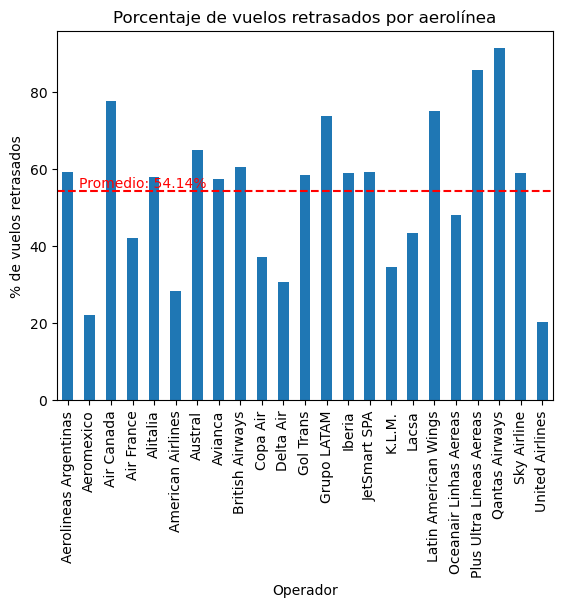

In [84]:
# Analisis de Retrasos por Aerolinea, para ver si se visualiza una correlacion entre los retrasos y la aerolinea.

# Agrupar los datos por Aerolinea y calcular el porcentaje de vuelos retrasados por cada aerolinea
porcentaje_retrasados_xAerolinea = df.groupby('OPERA')['Retrasado'].mean() * 100
promedio_x_aerolinea = porcentaje_retrasados_xAerolinea.mean()


# Visualizar los resultados con un gráfico de barras
porcentaje_retrasados_xAerolinea.plot(kind='bar')


plt.xlabel("Operador")
plt.ylabel("% de vuelos retrasados")
plt.title("Porcentaje de vuelos retrasados por aerolínea")

# Agregar una línea horizontal para el promedio de retrasos
plt.axhline(y=promedio_x_aerolinea, color='red', linestyle='--', label='Promedio')
plt.text(x=0.5, y=promedio_x_aerolinea+1, s=f"Promedio: {promedio_x_aerolinea:.2f}%", color='red')
plt.xticks(rotation=90)


# Mostrar el gráfico
plt.show()

#El siguiente grafico de barras nos muestra una distribucion muy desigual entre algunas Lineas Aereas en relacion al retraso
# de sus vuelos, un analisis preeliminar nos podria indicar que lineas areas con origen en Paises mas Lejanos a Chile
#tienen una tendencia a sufrir una mayor cantidad de retrasos, un analisis de vuelos Nacionales e Internacionales nos podrian
#ayudar a comprobar la hipotesis.

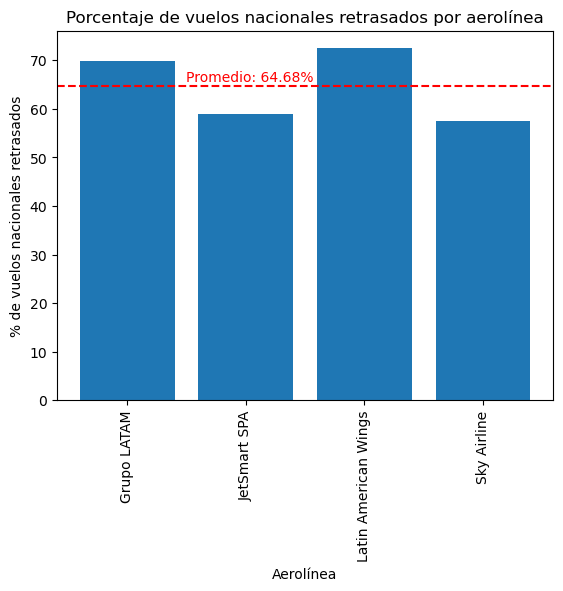

In [81]:
# Analisis de Retrasos de los vuelos Nacionales por Aerolinea

# Filtrar los vuelos nacionales
df_nacionales = df[df['TIPOVUELO'] == 'N']

# Obtener el total de vuelos nacionales por aerolínea
total_vuelos_nacionales_por_aerolinea = df_nacionales.groupby("OPERA")["Vlo-O"].count()

# Obtener el número de vuelos nacionales retrasados por aerolínea
vuelos_nacionales_retrasados_por_aerolinea = df_nacionales[df_nacionales["Retrasado"] > 0].groupby("OPERA")["Vlo-O"].count()

# Calcular el porcentaje de vuelos nacionales retrasados por aerolínea
porcentaje_vuelos_nacionales_retrasados_por_aerolinea = (vuelos_nacionales_retrasados_por_aerolinea / total_vuelos_nacionales_por_aerolinea) * 100
Promedio_nacional = porcentaje_vuelos_nacionales_retrasados_por_aerolinea.mean()

# Crear el gráfico de barras
plt.bar(porcentaje_vuelos_nacionales_retrasados_por_aerolinea.index, porcentaje_vuelos_nacionales_retrasados_por_aerolinea.values)

# Establecer los títulos de los ejes y del gráfico
plt.xlabel("Aerolínea")
plt.ylabel("% de vuelos nacionales retrasados")
plt.title("Porcentaje de vuelos nacionales retrasados por aerolínea")

# Agregar una línea horizontal para el promedio de retrasos
plt.axhline(y=Promedio_nacional, color='red', linestyle='--', label='Promedio')
plt.text(x=0.5, y=Promedio_nacional+1, s=f"Promedio: {Promedio_nacional:.2f}%", color='red')
plt.xticks(rotation=90)
# Mostrar el gráfico
plt.show()

#En relacion solo a los vuelos Nacionales el % Promedio de Retrasos rondea aprox el 65% de los vuelos.
#Se puede inferir que la tendencia de los retrasos en los vuelos Nacionales se asimila al Promedio total de Retrasos ya se por Mes o día de la semana


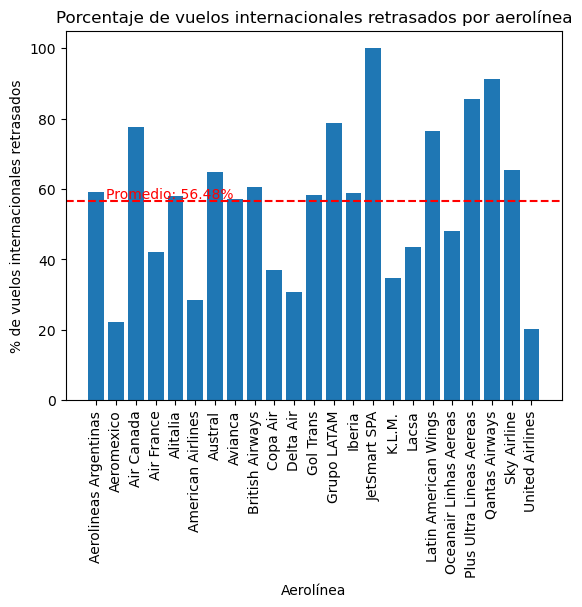

In [71]:
# Analisis de Retrasos de los vuelos Internacionales por Aerolinea

# Filtrar los vuelos nacionales
df_internacional = df[df['TIPOVUELO'] == 'I']

# Obtener el total de vuelos nacionales por aerolínea
total_vuelos_inter_por_aerolinea = df_internacional.groupby("OPERA")["Vlo-O"].count()

# Obtener el número de vuelos internacionales retrasados por aerolínea
vuelos_inter_retrasados_por_aerolinea = df_internacional[df_internacional["Retrasado"] > 0].groupby("OPERA")["Vlo-O"].count()

# Calcular el porcentaje de vuelos internacionales retrasados por aerolínea
porcentaje_vuelos_inter_retrasados_por_aerolinea = (vuelos_inter_retrasados_por_aerolinea / total_vuelos_inter_por_aerolinea) * 100
Promedio_internacional = porcentaje_vuelos_inter_retrasados_por_aerolinea.mean()

# Crear el gráfico de barras
plt.bar(porcentaje_vuelos_inter_retrasados_por_aerolinea.index, porcentaje_vuelos_inter_retrasados_por_aerolinea.values)

# Establecer los títulos de los ejes y del gráfico
plt.xlabel("Aerolínea")
plt.ylabel("% de vuelos internacionales retrasados")
plt.title("Porcentaje de vuelos internacionales retrasados por aerolínea")

# Agregar una línea horizontal para el promedio de retrasos
plt.axhline(y=Promedio_internacional, color='red', linestyle='--', label='Promedio')
plt.text(x=0.5, y=Promedio_internacional+1, s=f"Promedio: {Promedio_internacional:.2f}%", color='red')
plt.xticks(rotation=90)
# Mostrar el gráfico
plt.show()


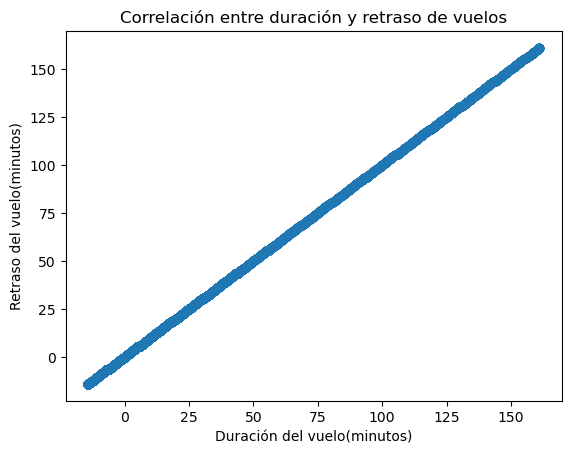

In [22]:
#Para realizar una correlación entre el retraso y la duración de los vuelos, 
#se puede utilizar la biblioteca pandas de Python, que permite la manipulación
#y análisis de datos de forma eficiente.

#Calculando la duracion de los vuelos
df["Duracion"] = pd.to_datetime(df["Fecha-O"]) - pd.to_datetime(df["Fecha-I"])

#A continuación, se debe convertir la duración a una unidad de tiempo numérica (por ejemplo, minutos) para poder realizar cálculos:
df["Duracion"] = df["Duracion"].dt.total_seconds() / 60

#Después, se puede calcular la correlación entre la duración y el retraso de los vuelos utilizando la función corr de pandas:
correlation = df["Duracion"].corr(df["Retraso"])

# Visualizar los resultados con un gráfico
fig, ax = plt.subplots()
# Dibuja el diagrama de dispersión
ax.scatter(df['Duracion'], df['Retraso'])

# Agrega títulos y etiquetas de los ejes
ax.set_title('Correlación entre duración y retraso de vuelos')
ax.set_xlabel('Duración del vuelo(minutos)')
ax.set_ylabel('Retraso del vuelo(minutos)')
# Muestra el diagrama de dispersión
plt.show()

<Axes: xlabel='TIPOVUELO'>

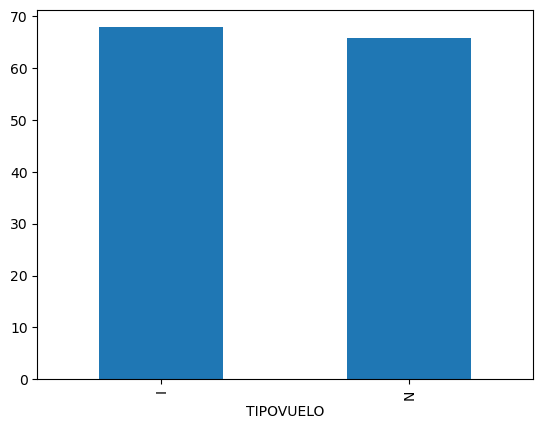

In [11]:
# Analisis de Retrasos por Tipo de vuelo (Nacional o Internacional).

# Agrupar los datos por tipo de vuelo y calcular el porcentaje de vuelos retrasados
porcentaje_retrasados_xTipo = df.groupby('TIPOVUELO')['Retrasado'].mean() * 100

# Visualizar los resultados con un gráfico de barras
porcentaje_retrasados_xTipo.plot(kind='bar')

#Los retrasos se distribuyen uniformemente entre los Tipo Nacional e Internal, por lo tanto, no se puede correlacionar los 
#retrasos en relacion al tipo de vuelo.

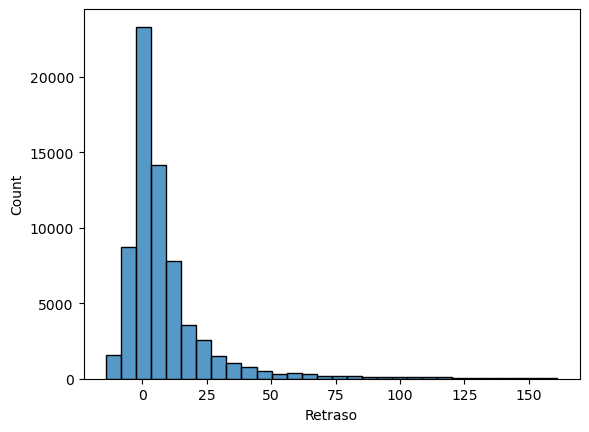

In [57]:
# graficar la distribución de los retrasos

# Crear una columna con la diferencia en horas entre Fecha-I y Fecha-O
# calcular el retraso de cada vuelo
data['Retraso'] = (pd.to_datetime(data['Fecha-O']) - pd.to_datetime(data['Fecha-I'])).dt.total_seconds() / 60

sns.histplot(data=data, x=data['Retraso'], bins=30)
plt.show()

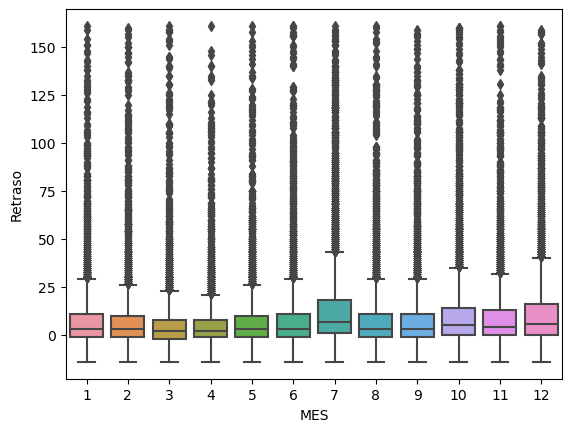

In [58]:
# graficar la distribución de los retrasos por mes
sns.boxplot(data=data, x='MES', y='Retraso')
plt.show()

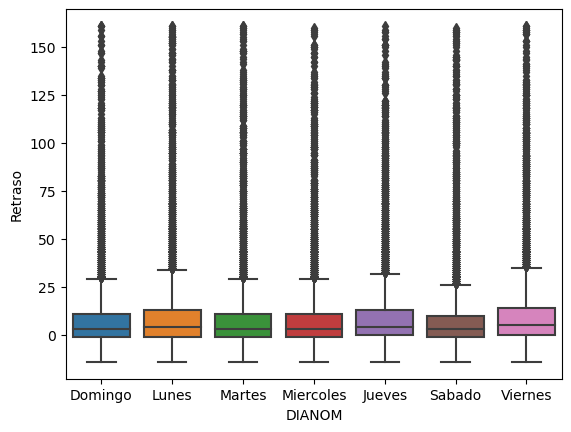

In [59]:
# graficar la distribución de los retrasos por día de la semana
sns.boxplot(data=data, x='DIANOM', y='Retraso')
plt.show()

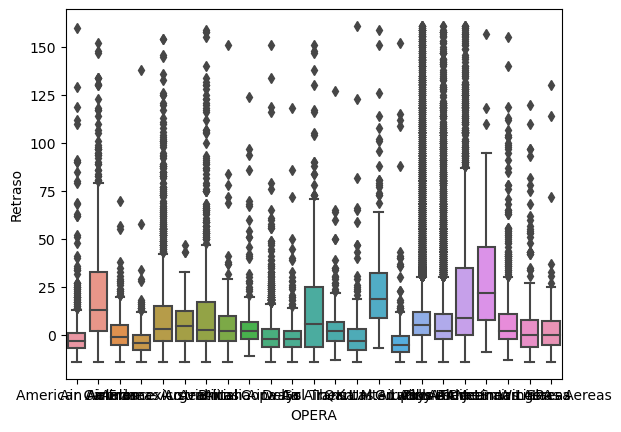

In [60]:
# graficar la distribución de los retrasos por aerolínea
sns.boxplot(data=data, x='OPERA', y='Retraso')
plt.show()


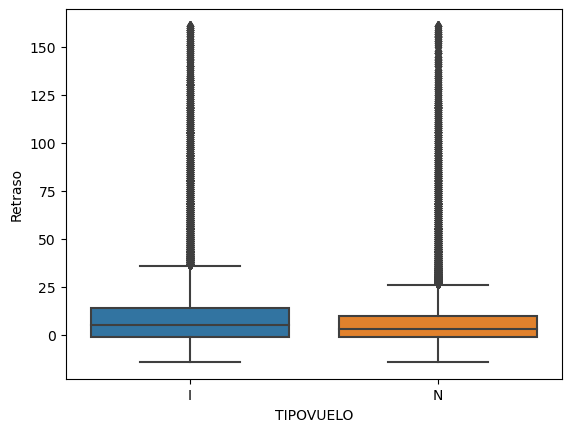

In [61]:
# graficar la distribución de los retrasos por tipo de vuelo
sns.boxplot(data=data, x='TIPOVUELO', y='Retraso')
plt.show()


In [69]:
# obtener la probabilidad de retraso por aerolínea
probabilidad_retraso = data.groupby('OPERA')['Retraso'].apply(lambda x: (x > 0).sum() / len(x)).reset_index(name='Probabilidad_Retraso')
probabilidad_retraso

,OPERA,Probabilidad_Retraso
0,Aerolineas Argentinas,0.591072
1,Aeromexico,0.222222
2,Air Canada,0.775221
3,Air France,0.421788
4,Alitalia,0.579151
5,American Airlines,0.284016
6,Austral,0.648649
7,Avianca,0.572917
8,British Airways,0.604878
9,Copa Air,0.370270


In [68]:
# obtener los destinos con mayor probabilidad de retraso
destinos_con_retraso = data[data['Retraso'] > 0].groupby('SIGLADES')['Retraso'].count().reset_index(name='Cantidad_Retrasos').sort_values('Cantidad_Retrasos', ascending=False).head(10)
destinos_con_retraso

,SIGLADES,Cantidad_Retrasos
8,Buenos Aires,4555
28,Lima,3688
0,Antofagasta,3517
42,Puerto Montt,3182
9,Calama,2989
24,Iquique,2635
54,Sao Paulo,2530
16,Concepcion,2486
56,Temuco,1794
45,Punta Arenas,1676


In [67]:
# obtener las horas del día con mayor probabilidad de retraso
horas_con_retraso = data[data['Retraso'] > 0].groupby(pd.to_datetime(data['Fecha-O']).dt.hour)['Retraso'].count().reset_index(name='Cantidad_Retrasos').sort_values('Cantidad_Retrasos', ascending=False).head(10)
horas_con_retraso

,Fecha-O,Cantidad_Retrasos
8,8,3145
7,7,2949
18,18,2742
15,15,2707
14,14,2645
9,9,2614
19,19,2572
17,17,2492
11,11,2458
13,13,2410


Paso 5: Modelo de clasificación

In [70]:
# importar librerías para el modelo de clasificación
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [72]:
# crear un DataFrame con las características y la variable objetivo
X = data[['MES', 'DIANOM', 'OPERA', 'SIGLADES', 'TIPOVUELO']]
y = data['Retraso'].apply(lambda x: 1 if x > 0 else 0)

# 2. Funciones básicas de visualización de los datos

- El proceso de visualización siempre debe realizarse sobre el trainning set y apartando el test set. Esto evita que nuestro cerebro genere intuiciones del test set que podemos incorporar en nuestro modelo
- Una buena práctica es crear una copia del trainning set y jugar con ella. De esta manera, si realizamos transformaciones que dañan el tranning set, el original no se ve afectado.

In [8]:
# Lectura y copia del conjunto de datos
df_orig = pd.read_csv("datasets/Data_SCL/dataset_SCL.csv", dtype=dtype, low_memory=False)
df = df_orig.copy()

In [9]:
# Mostrar en pantalla un número determinado de filas
df.head(10)

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami
5,2017-01-06 23:30:00,226,SCEL,KMIA,AAL,2017-01-07 00:04:00,226,SCEL,KMIA,AAL,7,1,2017,Sabado,I,American Airlines,Santiago,Miami
6,2017-01-07 23:30:00,226,SCEL,KMIA,AAL,2017-01-07 23:25:00,226,SCEL,KMIA,AAL,7,1,2017,Sabado,I,American Airlines,Santiago,Miami
7,2017-01-08 23:30:00,226,SCEL,KMIA,AAL,2017-01-08 23:25:00,226,SCEL,KMIA,AAL,8,1,2017,Domingo,I,American Airlines,Santiago,Miami
8,2017-01-09 23:30:00,226,SCEL,KMIA,AAL,2017-01-10 00:10:00,226,SCEL,KMIA,AAL,10,1,2017,Martes,I,American Airlines,Santiago,Miami
9,2017-01-11 23:30:00,226,SCEL,KMIA,AAL,2017-01-12 00:39:00,226,SCEL,KMIA,AAL,12,1,2017,Jueves,I,American Airlines,Santiago,Miami


In [10]:
# Mostrar información básica sobre el conjunto de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Fecha-I    68206 non-null  object
 1   Vlo-I      68206 non-null  object
 2   Ori-I      68206 non-null  object
 3   Des-I      68206 non-null  object
 4   Emp-I      68206 non-null  object
 5   Fecha-O    68206 non-null  object
 6   Vlo-O      68205 non-null  object
 7   Ori-O      68206 non-null  object
 8   Des-O      68206 non-null  object
 9   Emp-O      68206 non-null  object
 10  DIA        68206 non-null  int64 
 11  MES        68206 non-null  int64 
 12  AÑO        68206 non-null  int64 
 13  DIANOM     68206 non-null  object
 14  TIPOVUELO  68206 non-null  object
 15  OPERA      68206 non-null  object
 16  SIGLAORI   68206 non-null  object
 17  SIGLADES   68206 non-null  object
dtypes: int64(3), object(15)
memory usage: 9.4+ MB


In [11]:
# Mostrar información estadística sobre el conjunto de datos
df.describe()

,DIA,MES,AÑO
count,68206.000000,68206.000000,68206.000000
mean,15.714790,6.622585,2017.000029
std,8.782886,3.523321,0.005415
min,1.000000,1.000000,2017.000000
25%,8.000000,3.000000,2017.000000
50%,16.000000,7.000000,2017.000000
75%,23.000000,10.000000,2017.000000
max,31.000000,12.000000,2018.000000


In [13]:
# Mostrar los valores únicos que tiene un atributo determinado
df["TIPOVUELO"].value_counts()

N    36966
I    31240
Name: TIPOVUELO, dtype: int64

<Axes: >

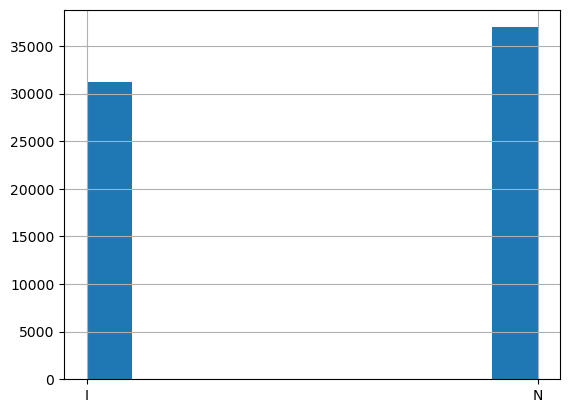

In [14]:
# Mostrar los valores de la característica como un histograma
%matplotlib inline
import matplotlib.pyplot as plt
df["TIPOVUELO"].hist()

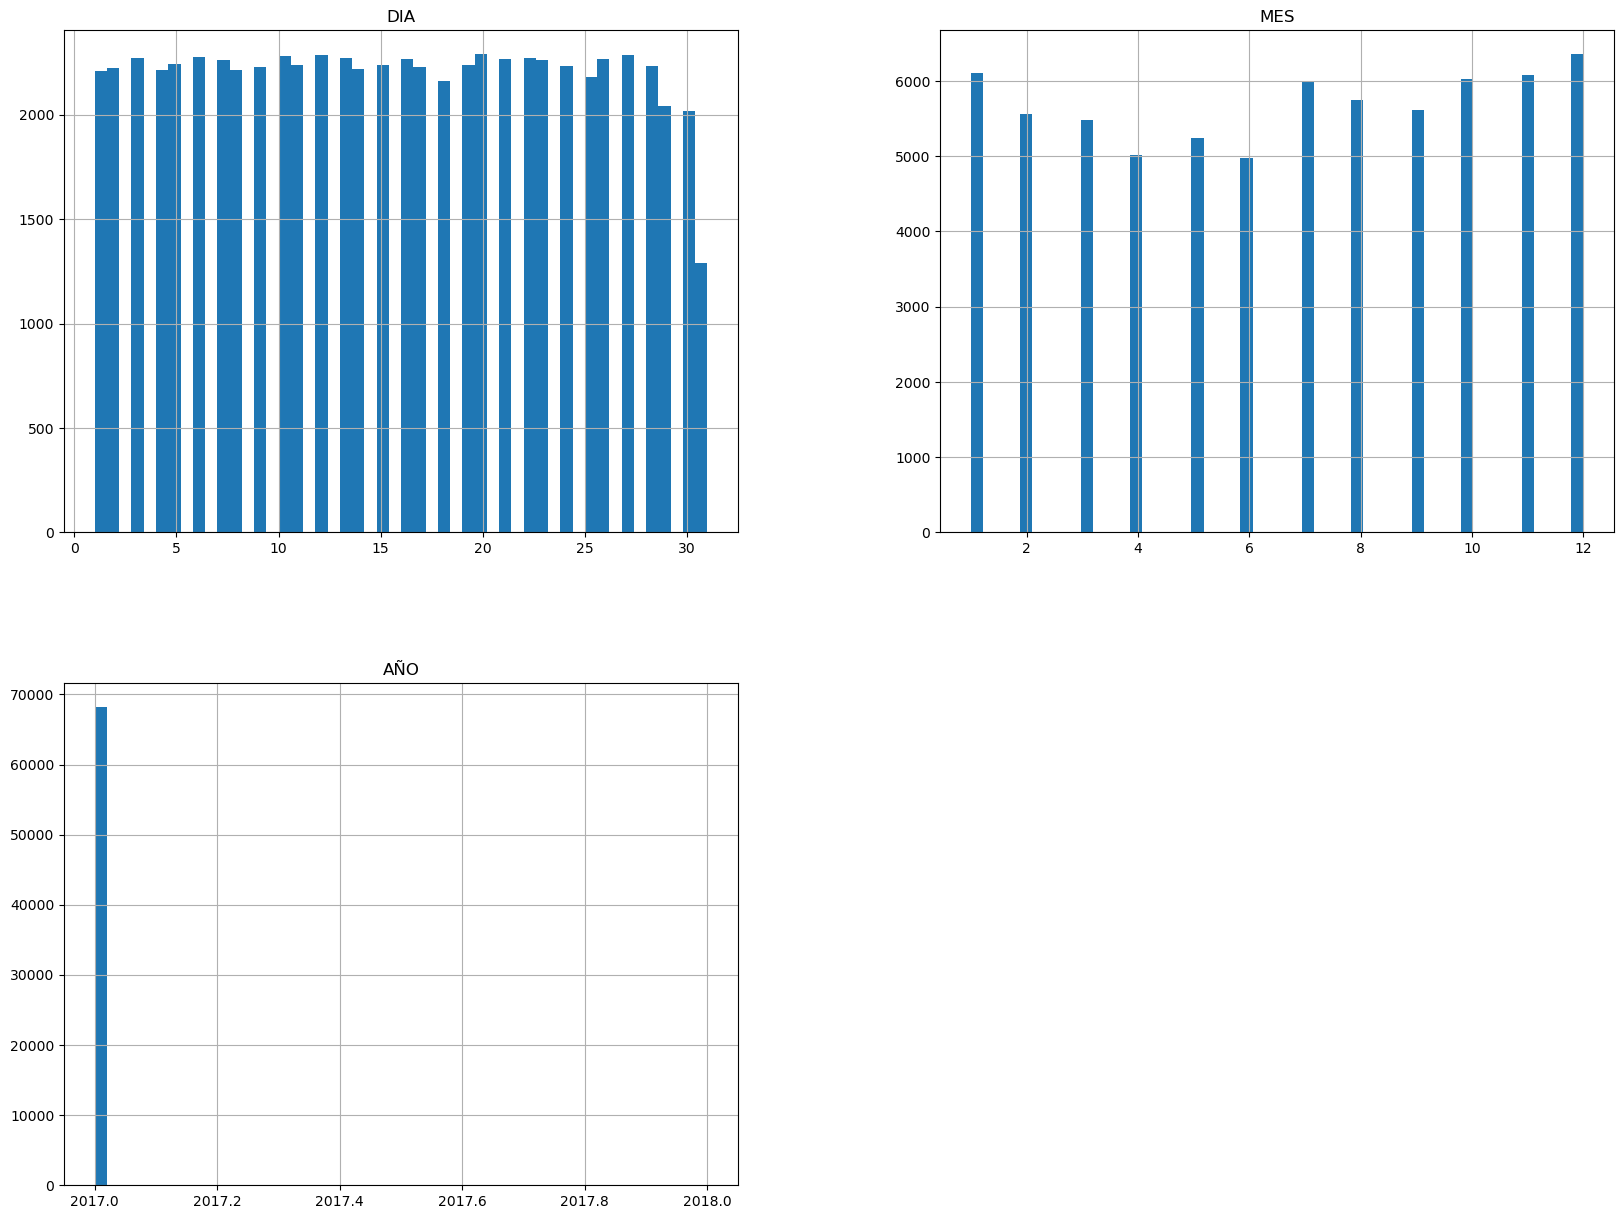

In [19]:
# Representar gráficamente la distribución de los atributos
df.hist(bins=50, figsize=(20,15))
plt.show()